<a href="https://colab.research.google.com/github/mariahelenass/ML-Models-Course/blob/main/RegressaoLinear_StatsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [15]:
df = pd.read_csv('mtcars.csv')

In [16]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
df.shape

(32, 12)

In [18]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [20]:
df = df.drop(columns=['model'], axis=1)

<Axes: >

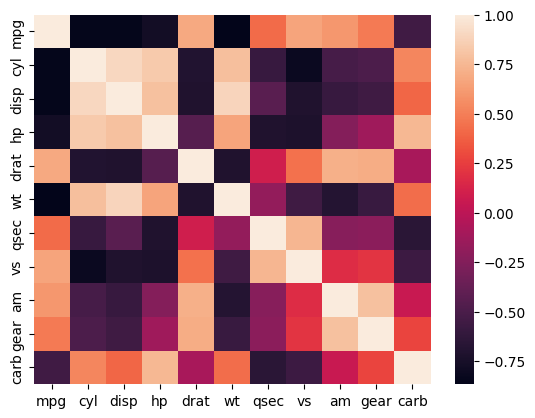

In [21]:
sns.heatmap(df.corr())

In [22]:
fig = px.scatter(df, x="mpg", y="cyl")
fig.show()

In [23]:
fig = px.scatter(df, x="mpg", y="disp")
fig.show()

In [25]:
fig = px.scatter(df, x="mpg", y="hp")
fig.show()

In [28]:
fig = px.scatter(df, x="mpg", y="wt")
fig.show()

In [29]:
fig = px.scatter(df, x="mpg", y="disp", color="wt")
fig.show()

### Criando o modelo

In [45]:
#  teste 1: AIC - 156.6, BIC: 162.5
#  teste 2: AIC - 165.1, BIC: 169.5
#  teste 3: AIC - 179.1, BIC: 183.5
modelo = sm.ols(formula='mpg ~ drat + vs', data=df)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           5.82e-07
Time:                        17:51:06   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

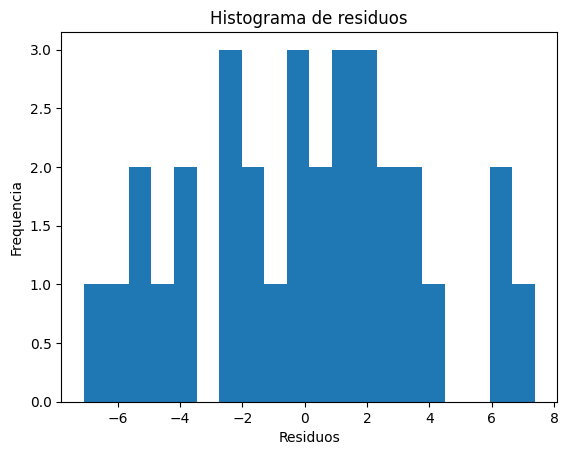

In [46]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de residuos")
plt.show()


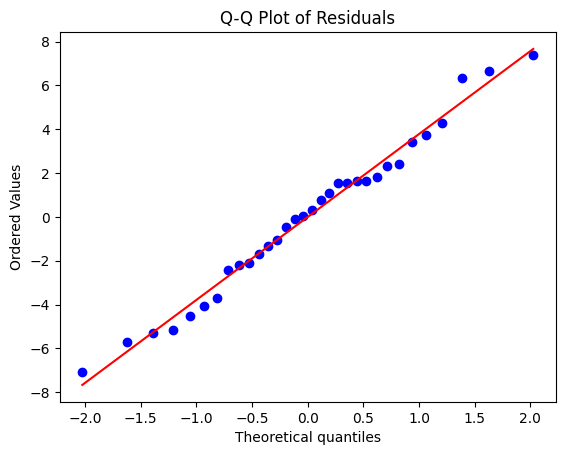

In [47]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## Teste de hipótese Shapiro-Wilk

hipotese nula h0: assume que seja verdadeira - h0: dados estão normalmente distribuídos

p <= 0.05 rejeita a hipótese nula (não estão normalmente distribuídos)

P > 0.05 não é possível rejeitar h0

In [48]:
stat, pval = stats.shapiro(residuos)
print(f"Shapiro-Wilk statística: {stat:.3f}, p-value: {pval:.3f}")
# teste 1:  p < 0.05 (dados não estão normalmente distribuídos)
# teste 2:  p > 0.05 (dados estão normalmente distribuídos)
# teste 3:  p > 0.05 (dados estão normalmente distribuídos)

Shapiro-Wilk statística: 0.981, p-value: 0.822
